<a href="https://colab.research.google.com/github/Daivar/Deep_Learning_Models/blob/main/RNN_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

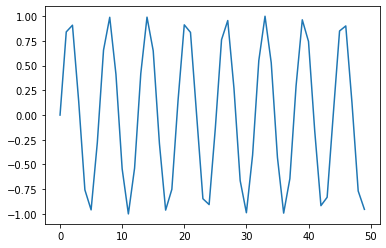

In [1]:
# simple RNN

import math
import numpy as np
import matplotlib.pyplot as plt

sin_wave = np.array([math.sin(x) for x in np.arange(200)])
plt.plot(sin_wave[:50])

In [2]:
# biuld the data in the form (sequence_count x items_in_sequence x feature_count / collumn count (commonly 1))
X, Y = [], []

seq_len = 50
num_records = len(sin_wave) - seq_len
print(num_records)

# create the inputs and the lables
for i in range(num_records - 50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])
    
X = np.array(X)
X = np.expand_dims(X, axis=2)

Y = np.array(Y)
Y = np.expand_dims(Y, axis=1)

X.shape, Y.shape

150


((100, 50, 1), (100, 1))

In [18]:
X_val, Y_val = [], []

for i in range(num_records - 50, num_records):
    X_val.append(sin_wave[i:i+seq_len])
    Y_val.append(sin_wave[i+seq_len])
    
X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis=2)

Y_val = np.array(Y_val)
Y_val = np.expand_dims(Y_val, axis=1)

X_val.shape, Y_val.shape

((50, 50, 1), (50, 1))

In [4]:
from numpy import array
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
data = data.reshape((1, 10, 1))
print(data.shape)

# Feeding the entire sequence right into the network:
# .. 1 - means 1 sample only
# .. 10 - means that all 10 values will be fed into the RNN
# .. 1 - 1 collumn / feature

data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
data = data.reshape((5, 2, 1))
print(data.shape)

print(data[0].squeeze())
print(data[1].squeeze())

(1, 10, 1)
(5, 2, 1)
[0.1 0.2]
[0.3 0.4]


In [9]:
print(data) # 2 sekos po 5 narius

[[[0.1 1. ]
  [0.2 0.9]
  [0.3 0.8]
  [0.4 0.7]
  [0.5 0.6]]

 [[0.6 0.5]
  [0.7 0.4]
  [0.8 0.3]
  [0.9 0.2]
  [1.  0.1]]]


In [10]:
data.reshape(2, 5, 2)

array([[[0.1, 1. ],
        [0.2, 0.9],
        [0.3, 0.8],
        [0.4, 0.7],
        [0.5, 0.6]],

       [[0.6, 0.5],
        [0.7, 0.4],
        [0.8, 0.3],
        [0.9, 0.2],
        [1. , 0.1]]])

In [5]:
from numpy import array
data = array([
	[0.1, 1.0], # ts1
	[0.2, 0.9], # ts2
	[0.3, 0.8], # ...
	[0.4, 0.7],
	[0.5, 0.6],
	[0.6, 0.5],
	[0.7, 0.4],
	[0.8, 0.3],
	[0.9, 0.2], # ...
	[1.0, 0.1]])# ts10
  
data = data.reshape(2, 5, 2)
print(data.shape)
print(data[0]) # so this is 1 sequence out of 2, that has 5 multivariate samples (2 collumns)

(2, 5, 2)
[[0.1 1. ]
 [0.2 0.9]
 [0.3 0.8]
 [0.4 0.7]
 [0.5 0.6]]


In [119]:
learning_rate = 0.0001    
nepoch = 55               
T = 50                   # length of sequence
hidden_dim = 100  
output_dim = 1

# gradient clipping
bptt_truncate = 5
min_clip_value = -10
max_clip_value = 10

# defin our activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [120]:
U = np.random.uniform(0, 1, (hidden_dim, T))          # U is the weight matrix for weights between input and hidden layers
W = np.random.uniform(0, 1, (hidden_dim, hidden_dim)) # V is the weight matrix for weights between hidden and output layers
V = np.random.uniform(0, 1, (output_dim, hidden_dim)) # W is the weight matrix for shared weights in the RNN layer (hidden layer)

print(U.shape)
print(W.shape)
print(V.shape)

(100, 50)
(100, 100)
(1, 100)


In [121]:
for epoch in range(nepoch):
    # check loss on train
    loss = 0.0
    
    # do a forward pass to get prediction
    for i in range(Y.shape[0]):
        x, y = X[i], Y[i]                    # get input, output values of each record
        prev_s = np.zeros((hidden_dim, 1))   # here, prev-s is the value of the previous activation of hidden layer; which is initialized as all zeroes
        for t in range(T):
            new_input = np.zeros(x.shape)    # we then do a forward pass for every timestep in the sequence
            new_input[t] = x[t]              # for this, we define a single input for that timestep
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            prev_s = s

    # calculate error 
        loss_per_record = (y - mulv)**2 / 2 # MSE
        loss += loss_per_record 
    loss = loss / float(y.shape[0])

In [140]:
for epoch in range(nepoch):
    # check loss on train
    loss = 0.0

    # train model
    for i in range(Y.shape[0]):
        x, y = X[i], Y[i]

        layers = []
        prev_s = np.zeros((hidden_dim, 1)) # random init 
        dU = np.zeros(U.shape)
        dV = np.zeros(V.shape)
        dW = np.zeros(W.shape)
        
        dU_t = np.zeros(U.shape)
        dV_t = np.zeros(V.shape)
        dW_t = np.zeros(W.shape)
        
        dU_i = np.zeros(U.shape)
        dW_i = np.zeros(W.shape)
        
        # forward pass
        for t in range(T):
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            layers.append({'s':s, 'prev_s':prev_s})
            prev_s = s

        # calculate error 
        loss_per_record = (y - mulv)**2 / 2 # ~MSE
        loss += loss_per_record
    loss = loss / float(y.shape[0])

    dmulv = (mulv - y)
    # print(len(layers))

    # backward pass
    for t in range(T): # unrolling for each time step in asingle sequence
        dV_t = np.dot(dmulv, np.transpose(layers[t]['s']))
        dsv = np.dot(np.transpose(V), dmulv)
        
        ds = dsv
        dadd = add * (1 - add) * ds
        dmulw = dadd * np.ones_like(mulw)
        dprev_s = np.dot(np.transpose(W), dmulw)

        for i in range(t-1, max(-1, t-bptt_truncate-1), -1):
            ds = dsv + dprev_s
            dadd = add * (1 - add) * ds

            dmulw = dadd * np.ones_like(mulw)
            dmulu = dadd * np.ones_like(mulu)

            dW_i = np.dot(W, layers[t]['prev_s'])
            dprev_s = np.dot(np.transpose(W), dmulw)

            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            dU_i = np.dot(U, new_input)
            dx = np.dot(np.transpose(U), dmulu)

            dU_t += dU_i
            dW_t += dW_i
            
        dV += dV_t
        dU += dU_t
        dW += dW_t

        # Using gradient clipping, see the following for more:
        # ... https://deepai.org/machine-learning-glossary-and-terms/gradient-clipping
        # ... the derivatives will not go past 10 and -10
        if dU.max() > max_clip_value:
            dU[dU > max_clip_value] = max_clip_value
        if dV.max() > max_clip_value:
            dV[dV > max_clip_value] = max_clip_value
        if dW.max() > max_clip_value:
            dW[dW > max_clip_value] = max_clip_value
            

        if dU.min() < min_clip_value:
            dU[dU < min_clip_value] = min_clip_value
        if dV.min() < min_clip_value:
            dV[dV < min_clip_value] = min_clip_value
        if dW.min() < min_clip_value:
            dW[dW < min_clip_value] = min_clip_value
            
        # update the weights between all the layers
        U -= learning_rate * dU
        V -= learning_rate * dV
        W -= learning_rate * dW


    # check loss on val
    val_loss = 0.0
    for i in range(Y_val.shape[0]):
        x, y = X_val[i], Y_val[i]
        prev_s = np.zeros((hidden_dim, 1))
        for t in range(T):
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            prev_s = s

        loss_per_record = (y - mulv)**2 / 2
        val_loss += loss_per_record
    val_loss = val_loss / float(y.shape[0])
    print('Epoch: ', epoch + 1, ', Loss: ', loss, ', Val Loss: ', val_loss)

Epoch:  1 , Loss:  [[511.45844595]] , Val Loss:  [[19.86983668]]
Epoch:  2 , Loss:  [[40.20552421]] , Val Loss:  [[180.49298655]]
Epoch:  3 , Loss:  [[361.86046631]] , Val Loss:  [[21.65731451]]
Epoch:  4 , Loss:  [[43.74224107]] , Val Loss:  [[153.76846465]]
Epoch:  5 , Loss:  [[307.86855906]] , Val Loss:  [[20.1207465]]
Epoch:  6 , Loss:  [[40.53286533]] , Val Loss:  [[118.73221521]]
Epoch:  7 , Loss:  [[237.71169429]] , Val Loss:  [[25.74145194]]
Epoch:  8 , Loss:  [[51.83311641]] , Val Loss:  [[68.07936027]]
Epoch:  9 , Loss:  [[136.52224118]] , Val Loss:  [[12.66006521]]
Epoch:  10 , Loss:  [[25.50249192]] , Val Loss:  [[8.24793511]]
Epoch:  11 , Loss:  [[16.9000685]] , Val Loss:  [[95.20516702]]
Epoch:  12 , Loss:  [[190.67083125]] , Val Loss:  [[10.00326324]]
Epoch:  13 , Loss:  [[20.46434836]] , Val Loss:  [[64.30146687]]
Epoch:  14 , Loss:  [[128.91044073]] , Val Loss:  [[13.15167697]]
Epoch:  15 , Loss:  [[26.8428227]] , Val Loss:  [[47.82700946]]
Epoch:  16 , Loss:  [[96.059

In [141]:
# TBTT

# generate predictions for all the data based on the computed weights in the model

preds = []
for i in range(Y.shape[0]):
    x, y = X[i], Y[i]
    prev_s = np.zeros((hidden_dim, 1))
    # Forward pass
    for t in range(T):
        mulu = np.dot(U, x)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        prev_s = s

    preds.append(mulv)
    
preds = np.array(preds)

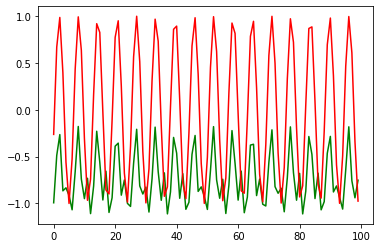

In [142]:
plt.plot(preds[:, 0, 0], 'g')
plt.plot(Y[:, 0], 'r')
plt.show()

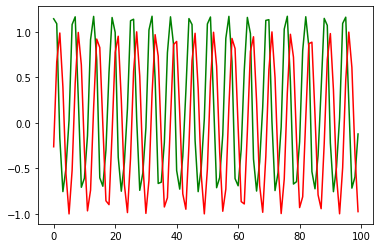

In [106]:
plt.plot(preds[:, 0, 0], 'g')
plt.plot(Y[:, 0], 'r')
plt.show()

In [2]:
# RNN Keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import matplotlib as mpl

# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [4]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

In [164]:
X_train

array([[[ 0.4596948 ],
        [ 0.31486678],
        [ 0.12497123],
        ...,
        [ 0.32104868],
        [ 0.13293117],
        [-0.15862931]],

       [[ 0.24511378],
        [ 0.23174433],
        [-0.00599396],
        ...,
        [ 0.49712527],
        [ 0.41383964],
        [ 0.2979726 ]],

       [[ 0.2817575 ],
        [ 0.36084807],
        [ 0.39095697],
        ...,
        [-0.47353426],
        [-0.51123077],
        [-0.47599974]],

       ...,

       [[ 0.4643898 ],
        [ 0.17030203],
        [-0.0747556 ],
        ...,
        [ 0.65820885],
        [ 0.54846185],
        [ 0.3173613 ]],

       [[ 0.0072364 ],
        [-0.20781188],
        [-0.3780026 ],
        ...,
        [-0.07166255],
        [-0.20090096],
        [-0.3475542 ]],

       [[-0.6709723 ],
        [-0.6589038 ],
        [-0.64380425],
        ...,
        [ 0.46026787],
        [ 0.6671777 ],
        [ 0.6631884 ]]], dtype=float32)

In [ ]:
X_train[1]

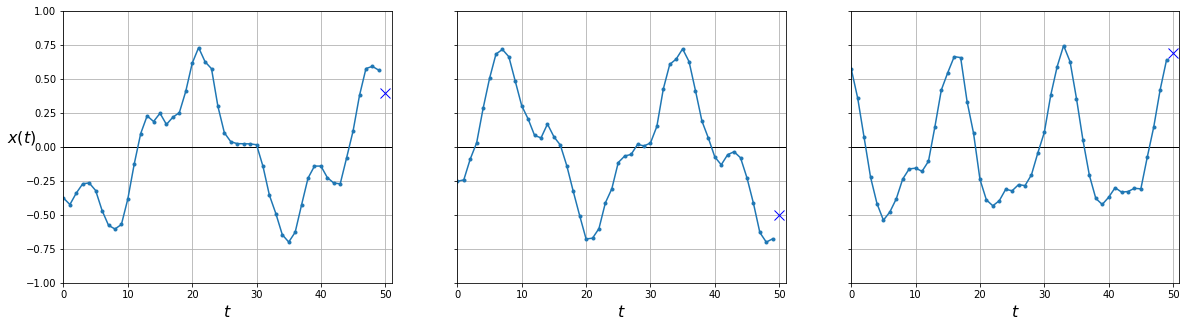

In [5]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 5))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0], y_label=("$x(t)$" if col==0 else None))

plt.show()

In [ ]:
X_train

In [ ]:
y_test

In [6]:
# Naive forecasting

y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

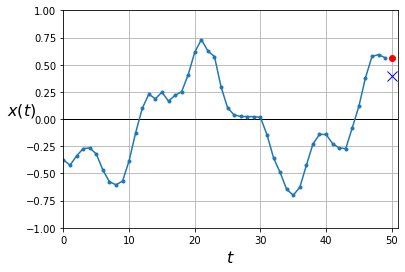

In [7]:
plot_series(X_valid[0, :, -1], y_valid[0, -1], y_pred[0, 0])
plt.show()

In [8]:
# FCFFNN forecasting

print(y_train.shape)
print(X_train.shape)

(7000, 1)
(7000, 50, 1)


In [44]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[50, 1]))
model.add(keras.layers.Dense(1)) # Predicting single number for every 50 numbers (and depending on how many sequences were given)

model.compile(loss='mse') # model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.005))
# If unspecified, batch_size will default to 32
history = model.fit(X_train, y_train, batch_size=10, epochs=5, verbose=1, validation_data=(X_test, y_test)) 

print(model.evaluate(X_test, y_test, verbose=0))

Epoch 1/5
700/700 [==============================] - 1s 1ms/step - loss: 0.0672 - val_loss: 0.0095
Epoch 2/5
700/700 [==============================] - 1s 1ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 3/5
700/700 [==============================] - 1s 1ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 4/5
700/700 [==============================] - 1s 1ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 5/5
700/700 [==============================] - 1s 1ms/step - loss: 0.0044 - val_loss: 0.0044
0.0044005028903484344


In [45]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


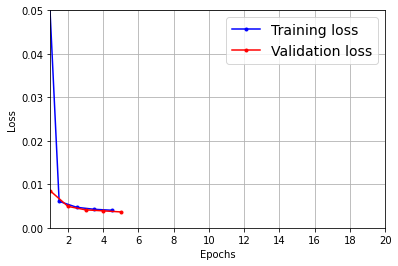

In [27]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [11]:
 # we are going to predict a output value for each 50 input values for a set of 2000 sequence
print(X_valid.shape)

(2000, 50, 1)


(2000, 1)


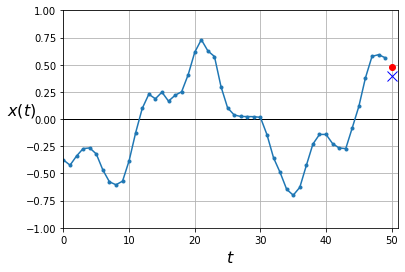

In [28]:
y_pred = model.predict(X_valid)
print(y_pred.shape)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0]) # because we take the X[0], we need to take y[0]
# plot_series(X_valid[1, :, 0], y_valid[1, 0], y_pred[1, 0])
plt.show()

In [46]:
model = keras.models.Sequential()
# single RNN neuron in this layer that will accept a sequence of whatever lenght that has 1 collumn
model.add(keras.layers.SimpleRNN(1, input_shape=[None, 1])) 

model.compile(loss='mse')
history = model.fit(X_train, y_train, batch_size=5, epochs=5, verbose=2, validation_data=(X_test, y_test))

print(model.evaluate(X_test, y_test, verbose=0))

Epoch 1/5
1400/1400 - 9s - loss: 0.2690 - val_loss: 0.1649 - 9s/epoch - 6ms/step
Epoch 2/5
1400/1400 - 8s - loss: 0.0838 - val_loss: 0.0179 - 8s/epoch - 6ms/step
Epoch 3/5
1400/1400 - 8s - loss: 0.0132 - val_loss: 0.0120 - 8s/epoch - 6ms/step
Epoch 4/5
1400/1400 - 8s - loss: 0.0116 - val_loss: 0.0114 - 8s/epoch - 6ms/step
Epoch 5/5
1400/1400 - 8s - loss: 0.0114 - val_loss: 0.0113 - 8s/epoch - 6ms/step
0.01126224547624588


In [47]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_19 (SimpleRNN)   (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [24]:
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]))
model.add(keras.layers.SimpleRNN(20)) # return_sequences=True
model.add(keras.layers.Dense(1))

model.compile(loss='mse', optimizer="adam")
history = model.fit(X_train, y_train, batch_size=5, epochs=5, verbose=1, validation_data=(X_test, y_test))

print(model.evaluate(X_test, y_test, verbose=0))

Epoch 1/5
1400/1400 [==============================] - 23s 15ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 2/5
1400/1400 [==============================] - 21s 15ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 3/5
1400/1400 [==============================] - 22s 16ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 4/5
1400/1400 [==============================] - 21s 15ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 5/5
1400/1400 [==============================] - 21s 15ms/step - loss: 0.0034 - val_loss: 0.0041
0.004086690489202738


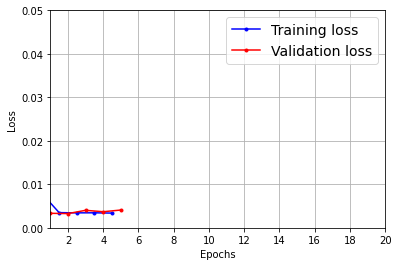

In [25]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

(2000, 1)


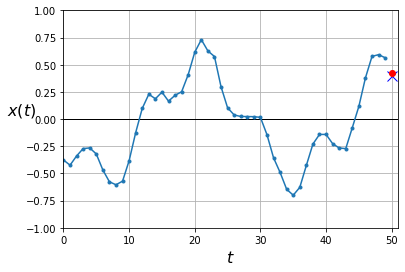

In [17]:
y_pred = model.predict(X_valid)
print(y_pred.shape)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0]) # because we take the X[0], we need to take y[0]
# plot_series(X_valid[1, :, 0], y_valid[1, 0], y_pred[1, 0])
plt.show()

In [ ]:
# model = keras.models.Sequential([ 
#     keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), 
#     keras.layers.SimpleRNN(20, return_sequences=True), 
#     keras.layers.SimpleRNN(1) 
# ])

In [22]:
# Deep RNNs - layering

model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]))
model.add(keras.layers.SimpleRNN(20, return_sequences=True)) # if no return_sequences=True --> expected ndim=3, found ndim=2 because the next layer expects 3D input
model.add(keras.layers.SimpleRNN(1))

model.compile(loss='mse', optimizer="adam")
history = model.fit(X_train, y_train, batch_size=5, epochs=5, verbose=1, validation_data=(X_test, y_test))

print(model.evaluate(X_test, y_test, verbose=0))

Epoch 1/5
1400/1400 [==============================] - 33s 22ms/step - loss: 0.0079 - val_loss: 0.0037
Epoch 2/5
1400/1400 [==============================] - 30s 22ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 3/5
1400/1400 [==============================] - 31s 22ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 4/5
1400/1400 [==============================] - 31s 22ms/step - loss: 0.0033 - val_loss: 0.0041
Epoch 5/5
1400/1400 [==============================] - 30s 22ms/step - loss: 0.0032 - val_loss: 0.0035
0.0035355091094970703


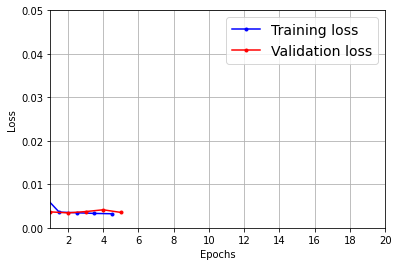

In [23]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]))
model.add(keras.layers.SimpleRNN(20)) # return_sequences=True
model.add(keras.layers.Dense(1))

model.compile(loss='mse', optimizer="adam")
history = model.fit(X_train, y_train, batch_size=5, epochs=10, verbose=1, validation_data=(X_test, y_test))

print(model.evaluate(X_test, y_test, verbose=0))

Epoch 1/10
1400/1400 [==============================] - 22s 15ms/step - loss: 0.0084 - val_loss: 0.0033
Epoch 2/10
1400/1400 [==============================] - 21s 15ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 3/10
1400/1400 [==============================] - 21s 15ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 4/10
1400/1400 [==============================] - 21s 15ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 5/10
1400/1400 [==============================] - 21s 15ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 6/10
1400/1400 [==============================] - 21s 15ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 7/10
1400/1400 [==============================] - 21s 15ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 8/10
1400/1400 [==============================] - 21s 15ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 9/10
1400/1400 [==============================] - 22s 15ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/10
1400/1400 [==============================] - 21s 15m

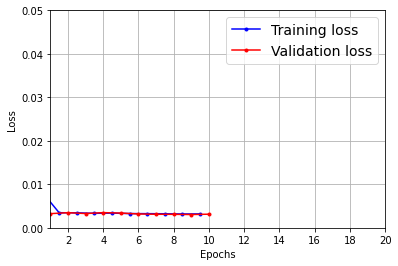

In [30]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

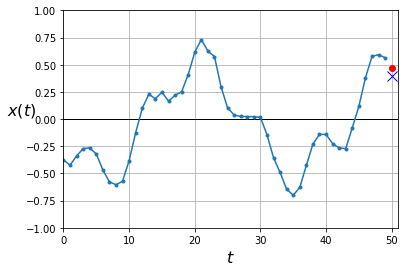

In [31]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [38]:
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(50, return_sequences=True, input_shape=[None, 1]))
# model.add(keras.layers.SimpleRNN(20)) # return_sequences=True
model.add(keras.layers.Dense(1))

model.compile(loss='mse', optimizer="adam")
history = model.fit(X_train, y_train, batch_size=5, epochs=5, verbose=1, validation_data=(X_test, y_test))

print(model.evaluate(X_test, y_test, verbose=0))

Epoch 1/5
1400/1400 [==============================] - 12s 8ms/step - loss: 0.1222 - val_loss: 0.1004
Epoch 2/5
1400/1400 [==============================] - 11s 8ms/step - loss: 0.0939 - val_loss: 0.0963
Epoch 3/5
1400/1400 [==============================] - 11s 8ms/step - loss: 0.0875 - val_loss: 0.0837
Epoch 4/5
1400/1400 [==============================] - 11s 8ms/step - loss: 0.0837 - val_loss: 0.0881
Epoch 5/5
1400/1400 [==============================] - 11s 8ms/step - loss: 0.0810 - val_loss: 0.0788
0.0788457989692688


In [39]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_18 (SimpleRNN)   (None, None, 50)          2600      
                                                                 
 dense_6 (Dense)             (None, None, 1)           51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rnn_layer = model.get_layer('simple_rnn_18')
print(len(rnn_layer.weights))
print(rnn_layer.weights[0].shape)
print(rnn_layer.weights[1].shape)
print(rnn_layer.weights[2].shape)

In [32]:
np.random.seed(43) # not 42, as it would give the first series in the train set

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new

# call model.predict in a loop
# ... concat the predicted value to the X value 
# ... and passing the X again to predict
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]
Y_pred.shape

(1, 10, 1)

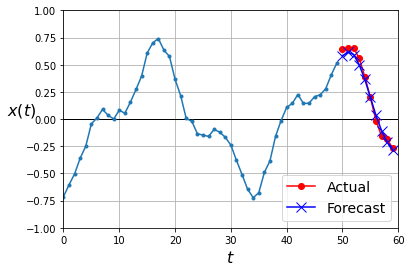

In [33]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [34]:
import numpy as np
import tensorflow as tf

inputs = np.random.random([32, 10, 8]).astype(np.float32)
simple_rnn = tf.keras.layers.SimpleRNN(4)
output = simple_rnn(inputs)
output

<tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[-0.03011796, -0.19403288,  0.15104467, -0.39483136],
       [-0.27831277,  0.4479955 ,  0.33286178, -0.81300896],
       [-0.18092057, -0.37674022,  0.43992227, -0.6493033 ],
       [-0.56993884, -0.45370302,  0.19101493, -0.2776992 ],
       [ 0.38389385,  0.30268958, -0.17565082, -0.7407643 ],
       [-0.25443304, -0.46976525,  0.25490832, -0.5174575 ],
       [ 0.1016496 ,  0.95825994,  0.44647738, -0.8557529 ],
       [-0.74118984,  0.5362061 , -0.28708762, -0.8845846 ],
       [-0.017961  , -0.08482835,  0.501802  , -0.70296144],
       [-0.6412465 ,  0.08968338,  0.13804227, -0.21767974],
       [ 0.07597099,  0.20716397,  0.19137587, -0.67798436],
       [-0.16394643,  0.39116818, -0.46239907, -0.79362494],
       [ 0.25803798,  0.40312812,  0.32004377, -0.8619155 ],
       [-0.11714548,  0.05135876,  0.4237907 , -0.03267072],
       [-0.5929115 ,  0.11022799,  0.26440614, -0.78120047],
       [-0.16846152,  0.3088637 ,  0

In [51]:
np.random.seed(43) # not 42, as it would give the first series in the train set

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new

# call model.predict in a loop
# ... concat the predicted value to the X value 
# ... and passing the X again to predict
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]
Y_pred.shape

(1, 10, 1)

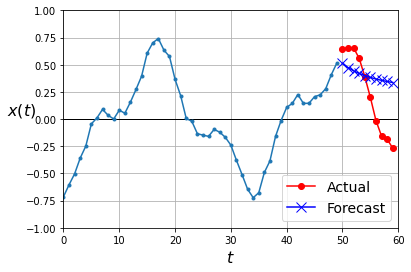

In [52]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [55]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

print(X_test.shape) 
print(Y_test.shape) # each y sequence will be longer by 9 (10) vs (1)

(1000, 50, 1)
(1000, 10)


In [56]:
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:, 0]

In [57]:
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_pred))

0.1731614

In [58]:
Y_naive_pred = Y_valid[:, -1:]
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_naive_pred))

0.22278848

In [75]:
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]))
model.add(keras.layers.SimpleRNN(20))
model.add(keras.layers.Dense(10)) # <--

model.compile(loss='mse', optimizer="adam")
# history = model.fit(X_train, y_train, batch_size=10, epochs=6, verbose=1, validation_data=(X_test, y_test))
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

print(model.evaluate(X_test, y_test, verbose=0))

Epoch 1/20
219/219 [==============================] - 6s 20ms/step - loss: 0.0648 - val_loss: 0.0343
Epoch 2/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0289 - val_loss: 0.0233
Epoch 3/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0184 - val_loss: 0.0154
Epoch 4/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0151 - val_loss: 0.0162
Epoch 5/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0140 - val_loss: 0.0124
Epoch 6/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0128 - val_loss: 0.0113
Epoch 7/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0121 - val_loss: 0.0127
Epoch 8/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0118 - val_loss: 0.0103
Epoch 9/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0114 - val_loss: 0.0105
Epoch 10/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0107 - val_lo

In [76]:
Y_pred = model.predict(X_new)

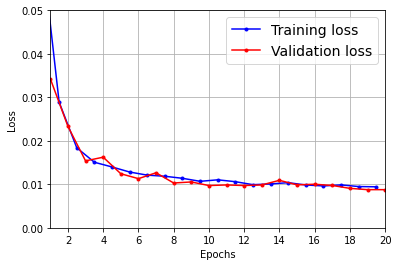

In [77]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [78]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

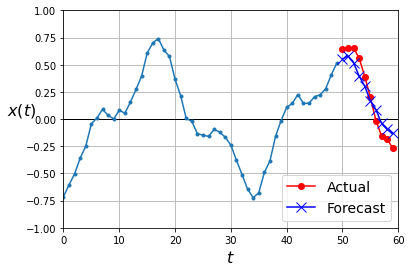

In [79]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [80]:
# LSTM & GRU

import numpy as np
import keras
import matplotlib.pyplot as plt
import matplotlib as mpl

def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [81]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

In [82]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

print(X_train.shape)

(7000, 50, 1)


In [83]:
# 3 different architectures - uncomment one and train

# model = keras.models.Sequential()
# model.add(keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]))
# model.add(keras.layers.SimpleRNN(20))
# model.add(keras.layers.Dense(10))
# # 22s 101ms/step - loss: 0.0603 - val_loss: 0.0269

# model = keras.models.Sequential()
# model.add(keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]))
# model.add(keras.layers.LSTM(20))
# model.add(keras.layers.Dense(10))
# # Epochs 20: 5s 21ms/step - loss: 0.0095 - val_loss: 0.0088
# # Epochs 20: 5s 21ms/step - loss: 0.0092 - val_loss: 0.0088

model = keras.models.Sequential()
model.add(keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]))
model.add(keras.layers.GRU(20))
model.add(keras.layers.Dense(10))
# Epoch 20: 5s 21ms/step - loss: 0.0082 - val_loss: 0.0081
# Epoch 20: 5s 21ms/step - loss: 0.0081 - val_loss: 0.0083

# NOTE: if the learning curves are decreasing slow, but not jumping around you can increase the LR
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Y_pred = model.predict(X_new)

Epoch 1/20
219/219 [==============================] - 14s 48ms/step - loss: 0.0686 - val_loss: 0.0444
Epoch 2/20
219/219 [==============================] - 10s 45ms/step - loss: 0.0411 - val_loss: 0.0373
Epoch 3/20
219/219 [==============================] - 9s 43ms/step - loss: 0.0339 - val_loss: 0.0295
Epoch 4/20
219/219 [==============================] - 9s 43ms/step - loss: 0.0279 - val_loss: 0.0241
Epoch 5/20
219/219 [==============================] - 10s 44ms/step - loss: 0.0232 - val_loss: 0.0190
Epoch 6/20
219/219 [==============================] - 9s 43ms/step - loss: 0.0184 - val_loss: 0.0153
Epoch 7/20
219/219 [==============================] - 9s 43ms/step - loss: 0.0139 - val_loss: 0.0122
Epoch 8/20
219/219 [==============================] - 10s 43ms/step - loss: 0.0123 - val_loss: 0.0123
Epoch 9/20
219/219 [==============================] - 9s 43ms/step - loss: 0.0115 - val_loss: 0.0108
Epoch 10/20
219/219 [==============================] - 9s 43ms/step - loss: 0.0108 - va

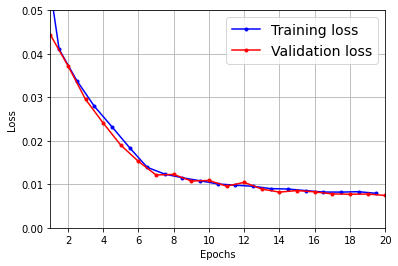

In [84]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

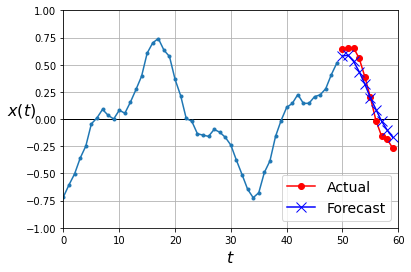

In [85]:
np.random.seed(43)
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [86]:
# 3 different architectures - uncomment one and train

model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]))
model.add(keras.layers.SimpleRNN(20))
model.add(keras.layers.Dense(10))
# 22s 101ms/step - loss: 0.0603 - val_loss: 0.0269

# model = keras.models.Sequential()
# model.add(keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]))
# model.add(keras.layers.LSTM(20))
# model.add(keras.layers.Dense(10))
# # Epochs 20: 5s 21ms/step - loss: 0.0095 - val_loss: 0.0088
# # Epochs 20: 5s 21ms/step - loss: 0.0092 - val_loss: 0.0088

# model = keras.models.Sequential()
# model.add(keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]))
# model.add(keras.layers.GRU(20))
# model.add(keras.layers.Dense(10))
# Epoch 20: 5s 21ms/step - loss: 0.0082 - val_loss: 0.0081
# Epoch 20: 5s 21ms/step - loss: 0.0081 - val_loss: 0.0083

# NOTE: if the learning curves are decreasing slow, but not jumping around you can increase the LR
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Y_pred = model.predict(X_new)

Epoch 1/20
219/219 [==============================] - 5s 19ms/step - loss: 0.0687 - val_loss: 0.0249
Epoch 2/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0217 - val_loss: 0.0199
Epoch 3/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0178 - val_loss: 0.0148
Epoch 4/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0148 - val_loss: 0.0141
Epoch 5/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0140 - val_loss: 0.0135
Epoch 6/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0130 - val_loss: 0.0116
Epoch 7/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0121 - val_loss: 0.0125
Epoch 8/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0118 - val_loss: 0.0114
Epoch 9/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0111 - val_loss: 0.0109
Epoch 10/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0109 - val_lo

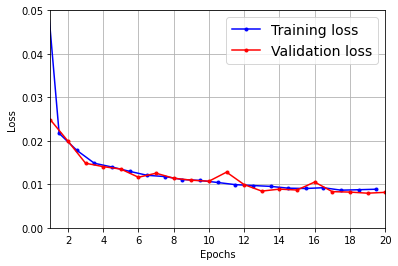

In [87]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

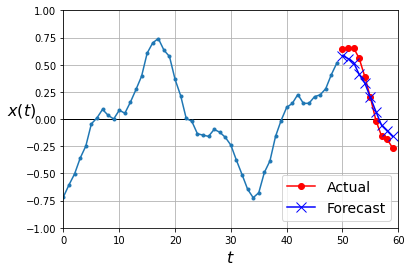

In [88]:
np.random.seed(43)
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [89]:
# 3 different architectures - uncomment one and train

# model = keras.models.Sequential()
# model.add(keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]))
# model.add(keras.layers.SimpleRNN(20))
# model.add(keras.layers.Dense(10))
# # 22s 101ms/step - loss: 0.0603 - val_loss: 0.0269

model = keras.models.Sequential()
model.add(keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]))
model.add(keras.layers.LSTM(20))
model.add(keras.layers.Dense(10))
# # Epochs 20: 5s 21ms/step - loss: 0.0095 - val_loss: 0.0088
# # Epochs 20: 5s 21ms/step - loss: 0.0092 - val_loss: 0.0088

# model = keras.models.Sequential()
# model.add(keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]))
# model.add(keras.layers.GRU(20))
# model.add(keras.layers.Dense(10))
# Epoch 20: 5s 21ms/step - loss: 0.0082 - val_loss: 0.0081
# Epoch 20: 5s 21ms/step - loss: 0.0081 - val_loss: 0.0083

# NOTE: if the learning curves are decreasing slow, but not jumping around you can increase the LR
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Y_pred = model.predict(X_new)

Epoch 1/20
219/219 [==============================] - 13s 42ms/step - loss: 0.0662 - val_loss: 0.0402
Epoch 2/20
219/219 [==============================] - 8s 38ms/step - loss: 0.0347 - val_loss: 0.0274
Epoch 3/20
219/219 [==============================] - 8s 38ms/step - loss: 0.0224 - val_loss: 0.0190
Epoch 4/20
219/219 [==============================] - 9s 39ms/step - loss: 0.0170 - val_loss: 0.0153
Epoch 5/20
219/219 [==============================] - 8s 38ms/step - loss: 0.0148 - val_loss: 0.0159
Epoch 6/20
219/219 [==============================] - 8s 38ms/step - loss: 0.0137 - val_loss: 0.0132
Epoch 7/20
219/219 [==============================] - 8s 39ms/step - loss: 0.0126 - val_loss: 0.0113
Epoch 8/20
219/219 [==============================] - 8s 38ms/step - loss: 0.0120 - val_loss: 0.0109
Epoch 9/20
219/219 [==============================] - 8s 38ms/step - loss: 0.0113 - val_loss: 0.0109
Epoch 10/20
219/219 [==============================] - 8s 38ms/step - loss: 0.0109 - val_l

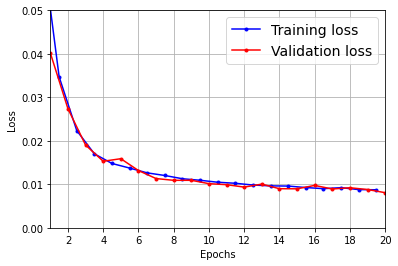

In [90]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

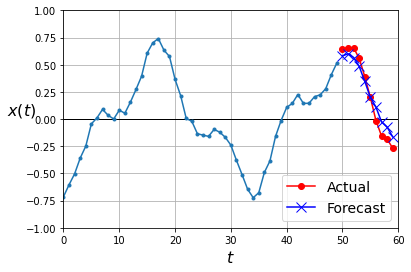

In [91]:
np.random.seed(43)
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()